## Observations and Insights 

* There were 248 mice after removing the mouse with the duplicate entry.

* In terms of final tumor volume, the most promising treatments were: 1) Ramicane (mean = 36.19 mm3, SE = 1.13) and 2) Capomulin (mean = 36.67, SE = 1.14), followed by 3) Propira (mean = 56.49 mm3, SE = 1.72) and 4) Infubinol (mean = 58.18, SE = 1.72). Final tumor volume in the remaining treatments ranged from 58.18 mm3 (SE = 1.72) to 62.81 mm3 (SE = 1.99).
    * There was one outlier in the Infubinol treatment group that had a final tumor volume that was substantially lower than the other mice in that treatment group. The outlier mouse should be re-examined to determine why it was more sensitive to this treatment.

* The number of male and female mice included in the study was approximately equal (males = 50.4\%; females = 49.6\%). Further analyses should look to see if there were any differences in treatment effectiveness between males and females.

* There appears to be a statistically significant relationship between mouse weight and its mean tumor volume (b = 0.95, SE = 0.13, P < 0.001).
    * Hence, mouse weight should be included as a covariate when comparing treatments.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_merge = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mice_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [14]:
# List of column names (this will be helpful for subsequent questions)
mice_merge.columns.to_list()

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [15]:
# Checking the number of mice.
print("Number of unique mice: " + str(len(mice_merge["Mouse ID"].value_counts())))

# Total number of rows (including duplicates)
print("Number of rows in DataFrame: " + str(len(mice_merge)))

Number of unique mice: 249
Number of rows in DataFrame: 1893


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = mice_merge[mice_merge.duplicated()]
display(duplicate_row[["Mouse ID", "Timepoint"]])

,Mouse ID,Timepoint
909,g989,0


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_ID = duplicate_row["Mouse ID"].to_list()[0]
mice_merge[mice_merge["Mouse ID"] == bad_mouse_ID]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_merge_cleaned = mice_merge[mice_merge["Mouse ID"] != bad_mouse_ID]

In [19]:
# Checking the number of mice in the clean DataFrame.
len(mice_merge_cleaned)

1880

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#-----------#

# I am limiting the summary statistics to the last timepoint recorded for each mouse!

mice_merge_maxtp = mice_merge_cleaned.loc[mice_merge_cleaned.groupby("Mouse ID")["Timepoint"].idxmax()]
mice_merge_groupby = mice_merge_maxtp.groupby("Drug Regimen")

TV_mean = mice_merge_groupby["Tumor Volume (mm3)"].mean()
TV_median = mice_merge_groupby["Tumor Volume (mm3)"].median()
TV_var = mice_merge_groupby["Tumor Volume (mm3)"].var()
TV_std = mice_merge_groupby["Tumor Volume (mm3)"].std()
TV_sem = mice_merge_groupby["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":TV_mean, 
                           "Median":TV_median, 
                           "Variance":TV_var, 
                           "Standard_Deviation":TV_std,
                           "Standard_Error":TV_sem})

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

display(summary_df)

# Using the aggregation method, produce the same summary statistics in a single line

mice_merge_maxtp.groupby("Drug Regimen").agg(
                                              Mean = ("Tumor Volume (mm3)", 'mean'), 
                                              Median = ("Tumor Volume (mm3)", 'median'),
                                              Variance = ("Tumor Volume (mm3)", 'var'),
                                              Standard_Deviation = ("Tumor Volume (mm3)", 'std'),
                                              Standard_Error = ("Tumor Volume (mm3)", 'sem')
                                             )

,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

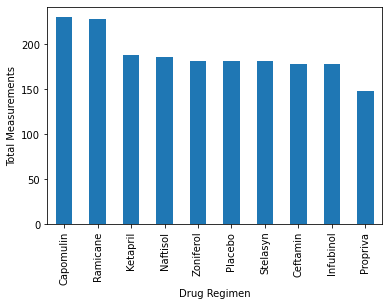

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measures_per_mouse = mice_merge_cleaned.groupby(["Drug Regimen", "Mouse ID"]).count()
measures_per_drug = measures_per_mouse.groupby("Drug Regimen").sum()
measures_per_drug_sorted = measures_per_drug.sort_values("Sex", ascending = False)

drug_measurements_bar = measures_per_drug_sorted["Sex"].plot(kind = "bar")
drug_measurements_bar.set_ylabel("Total Measurements")
plt.show()

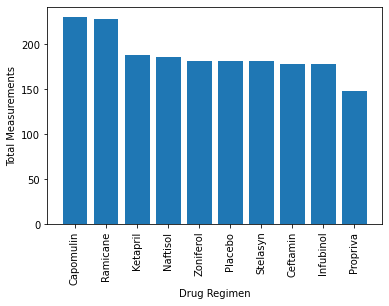

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = measures_per_drug_sorted.index.to_list()
counts = measures_per_drug_sorted["Sex"].to_list()


x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, counts)
plt.xticks(tick_locations, labels = drugs, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

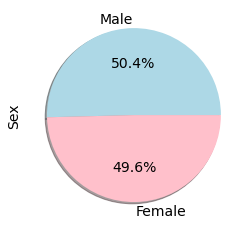

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#-----------#

# These pie charts show the number of unique male and female mice, not the total measures taken on each.

mice_unique = mice_merge_cleaned.drop_duplicates("Mouse ID")
mice_sex = mice_unique["Sex"].value_counts()

sex_pie = mice_sex.plot(kind = "pie", 
                        colors = ["lightblue", "pink"], 
                        textprops = {'fontsize':14},
                        shadow = True,
                        autopct = "%1.1f%%")

plt.ylabel("Sex", fontsize = 14)
plt.show()

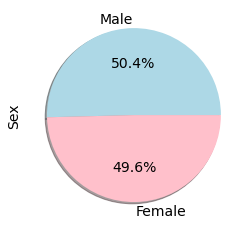

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_counts = mice_sex.to_list()
sex_labels = mice_sex.index.to_list()

plt.pie(mice_sex_counts, labels = sex_labels, 
                                  colors = ["lightblue", "pink"],
                                  shadow = True,
                                  textprops = {'fontsize':14},
                                  autopct = "%1.1f%%")

plt.ylabel("Sex", fontsize = 14)

plt.show()


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Same procedure as above using .idxmax() to get last timepoint:
mice_merge_maxtp = mice_merge_cleaned.loc[mice_merge_cleaned.groupby("Mouse ID")["Timepoint"].idxmax()]

mice_merge_maxtp_culled = mice_merge_maxtp.loc[(mice_merge_maxtp["Drug Regimen"] == "Capomulin") |
                                                   (mice_merge_maxtp["Drug Regimen"] == "Ramicane") |
                                                   (mice_merge_maxtp["Drug Regimen"] == "Infubinol") |
                                                   (mice_merge_maxtp["Drug Regimen"] == "Ceftamin"), :]

mice_merge_maxtp_culled.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0


In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Subset the DataFrames into Series containing final Tumor Volume data for each Drug Regimen
Capomulin_maxtp_df = mice_merge_maxtp_culled.loc[mice_merge_maxtp_culled["Drug Regimen"] == "Capomulin"]
Capomulin_maxtp_tv = Capomulin_maxtp_df["Tumor Volume (mm3)"]

Ramicane_maxtp_df = mice_merge_maxtp_culled.loc[mice_merge_maxtp_culled["Drug Regimen"] == "Ramicane"]
Ramicane_maxtp_tv = Ramicane_maxtp_df["Tumor Volume (mm3)"]

Infubinol_maxtp_df = mice_merge_maxtp_culled.loc[mice_merge_maxtp_culled["Drug Regimen"] == "Infubinol"]
Infubinol_maxtp_tv = Infubinol_maxtp_df["Tumor Volume (mm3)"]

Ceftamin_maxtp_df = mice_merge_maxtp_culled.loc[mice_merge_maxtp_culled["Drug Regimen"] == "Ceftamin"]
Ceftamin_maxtp_tv = Ceftamin_maxtp_df["Tumor Volume (mm3)"]

#-----------#

# The reference to the 'for for loop' was a little vague, so I am going to use my own approach:
# Since we need to repeat the same calculation for each drug regimen, I wrote a custom function.

# Custom function to calculate quartiles and detect outliers

def outlier(your_series, your_df):
    your_quarts = your_series.quantile([0.25, 0.50, 0.75])
    your_IQR = your_quarts[0.75] - your_quarts[0.25]
    U_thresh = your_quarts[0.75] + (1.5 * your_IQR)
    L_thresh = your_quarts[0.25] - (1.5 * your_IQR)
    print(f"The median is: {round(your_quarts[0.50],2)}.")
    print(f"The IQR is: {round(your_IQR, 2)}")
    print(f"The upper threshold for an outlier is: {round(U_thresh, 2)}.")
    print(f"The lower threshold for an outlier is: {round(L_thresh, 2)}.")
    index_list_upper = your_series[your_series > U_thresh].index.to_list()
    index_list_lower = your_series[your_series < L_thresh].index.to_list()
    index_list = index_list_upper + index_list_lower
    if len(index_list) == 0:
        print("There are no outliers\n")
    else:
        outlier_df = your_df.loc[index_list, :]
        print(f"Number of outliers: {len(outlier_df)}\n")
        display(outlier_df)

print("Capomulin")
outlier(Capomulin_maxtp_tv, mice_merge_maxtp_culled)

print("Ramicane")
outlier(Ramicane_maxtp_tv, mice_merge_maxtp_culled)

print("Infubinol")
outlier(Infubinol_maxtp_tv, mice_merge_maxtp_culled)

print("Ceftamin")
outlier(Ceftamin_maxtp_tv, mice_merge_maxtp_culled)    

Capomulin
The median is: 38.13.
The IQR is: 7.78
The upper threshold for an outlier is: 51.83.
The lower threshold for an outlier is: 20.7.
There are no outliers

Ramicane
The median is: 36.56.
The IQR is: 9.1
The upper threshold for an outlier is: 54.31.
The lower threshold for an outlier is: 17.91.
There are no outliers

Infubinol
The median is: 60.17.
The IQR is: 11.48
The upper threshold for an outlier is: 82.74.
The lower threshold for an outlier is: 36.83.
Number of outliers: 1



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


Ceftamin
The median is: 59.85.
The IQR is: 15.58
The upper threshold for an outlier is: 87.67.
The lower threshold for an outlier is: 25.36.
There are no outliers



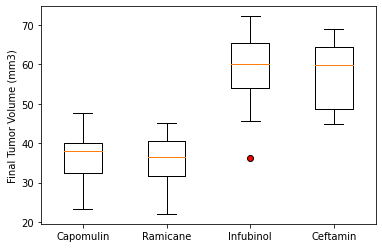

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_list_of_lists = [Capomulin_maxtp_tv, Ramicane_maxtp_tv, Infubinol_maxtp_tv, Ceftamin_maxtp_tv]
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(drugs_list_of_lists, labels = drug_names, flierprops = red_circle)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

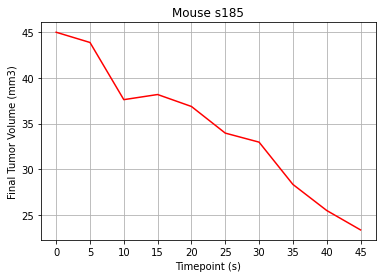

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Female mouse s185 :

s185_df = mice_merge_cleaned.loc[mice_merge_cleaned["Mouse ID"] == "s185", :]
s185_tp = s185_df["Timepoint"].to_list()  # x_values
s185_tv = s185_df["Tumor Volume (mm3)"].to_list()  # y_values

plt.plot(s185_tp, s185_tv, color = "red")
plt.grid()
plt.xticks(s185_tp)
plt.xlabel("Timepoint (s)")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Mouse s185")
plt.show()

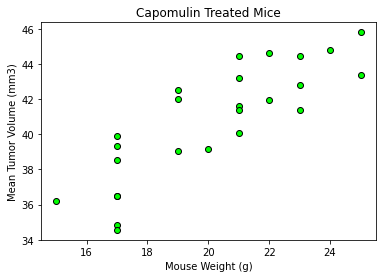

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Obtain vector of weights for each unique mouse
mice_merge_maxtp_Capomulin = mice_merge_maxtp.loc[mice_merge_maxtp["Drug Regimen"] == "Capomulin"]
mice_merge_Capomulin_weight = mice_merge_maxtp_Capomulin["Weight (g)"].to_list()

# Obtain vector of mean Tumor Volume for mice that were treated with Capomulin
mice_merge_cleaned_Capomulin = mice_merge_cleaned.loc[mice_merge_cleaned["Drug Regimen"] == "Capomulin"]
mean_tv_Cap = mice_merge_cleaned_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().to_list()

# Rebuild dataframe for next several steps
Capomulin_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_tv_Cap, 
                             "Weight (g)": mice_merge_Capomulin_weight})

# Make scatter plot:
plt.scatter(Capomulin_df["Weight (g)"], 
            Capomulin_df["Mean Tumor Volume (mm3)"],
            facecolors="lime", 
            edgecolors="black")
            
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title("Capomulin Treated Mice")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


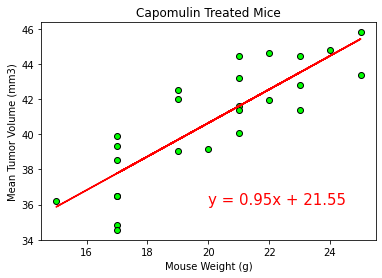

,Beta Coeffient,Standard Error,P_value
0,0.95444,0.127544,1.322572e-07


The null hypothesis that the slope is zero was rejected.


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Correlation coefficient
correlation = st.pearsonr(Capomulin_df["Weight (g)"], Capomulin_df["Mean Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Simplify names of data vectors
x_values = Capomulin_df["Weight (g)"]
y_values = Capomulin_df["Mean Tumor Volume (mm3)"]

# Call the linear model function:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate predicted values based on the linear model.
regress_values = x_values * slope + intercept

# Make scatter plot and fit line with annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="lime", edgecolors="black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title("Capomulin Treated Mice")
plt.show()

regression_table = pd.DataFrame({"Beta Coeffient": [slope],
                                 "Standard Error": [stderr],
                                 "P_value": [pvalue]})

display(regression_table)

if pvalue <= 0.05:
    print("The null hypothesis that the slope is zero was rejected.")
else:
    print("The null hypothesis of zero slope could not be rejected.")
